Loading weights: 100%|██████████| 100/100 [00:00<00:00, 585.81it/s, Materializing param=distilbert.transformer.layer.5.sa_layer_norm.weight]   
DistilBertForSequenceClassification LOAD REPORT from: distilbert-base-uncased
Key                     | Status     | 
------------------------+------------+-
vocab_projector.bias    | UNEXPECTED | 
vocab_layer_norm.bias   | UNEXPECTED | 
vocab_transform.weight  | UNEXPECTED | 
vocab_layer_norm.weight | UNEXPECTED | 
vocab_transform.bias    | UNEXPECTED | 
classifier.weight       | MISSING    | 
pre_classifier.weight   | MISSING    | 
pre_classifier.bias     | MISSING    | 
classifier.bias         | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.


Predicted Class: Crisis
Probabilities: [0.40904254 0.59095746]


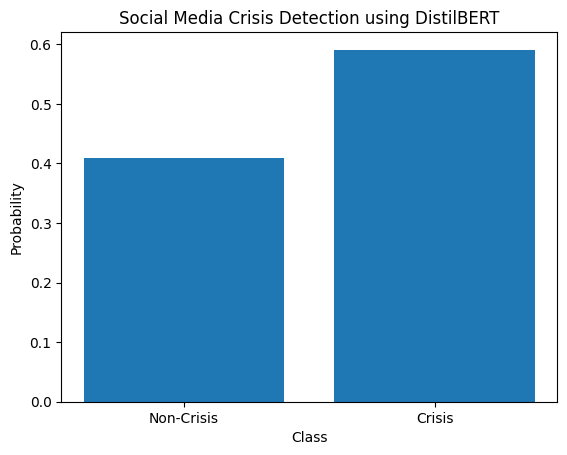

In [2]:
import torch
import matplotlib.pyplot as plt
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch.nn.functional as F

# ------------------------------
# 1️⃣ Load Pretrained DistilBERT
# ------------------------------
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

# 2 labels: 0 = Non-Crisis, 1 = Crisis
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=2
)

# ------------------------------
# 2️⃣ Example Social Media Text
# ------------------------------
text = "Massive flooding in Buxar, people trapped and need urgent rescue."

inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)

# ------------------------------
# 3️⃣ Get Prediction
# ------------------------------
outputs = model(**inputs)
logits = outputs.logits
probabilities = F.softmax(logits, dim=1)

probs = probabilities.detach().numpy()[0]

labels = ["Non-Crisis", "Crisis"]

predicted_class = labels[probs.argmax()]

print("Predicted Class:", predicted_class)
print("Probabilities:", probs)

# ------------------------------
# 4️⃣ Graphical Representation
# ------------------------------
plt.figure()

plt.bar(labels, probs)

plt.xlabel("Class")          # X-axis
plt.ylabel("Probability")    # Y-axis
plt.title("Social Media Crisis Detection using DistilBERT")

plt.show()